# Genetic Data Machine Learning Model

### By Alexander Pena

#### Assisted by:

Ted

# Library imports

In [1]:
import os
from IPython import display
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Data Import

First will look at the e1_positive.csv dataset

In [2]:
df = pd.read_csv("e1_positive.csv")
df

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
0,35.038262,161.176004,68.074337,58.063405,20.021864,269.294069,188.205520,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.001093,0.0,0.0,1
1,95.324867,75.256474,87.297510,0.000000,18.061554,342.166102,683.328784,0.000000,0.0,1.003420,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.003420,0.0,0.0,1
2,220.143867,187.976727,42.219372,106.553653,0.000000,187.976727,299.556496,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,7.036562,0.000000,0.0,0.0,1
3,166.010840,26.159284,61.373704,0.000000,30.183789,254.549955,446.720079,0.000000,0.0,25.153158,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.006126,0.0,0.0,1
4,188.426220,71.160966,119.269788,57.129226,16.036274,265.600789,287.650666,24.054411,0.0,1.002267,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,665.606813,101.002551,4.040102,0.000000,95.952424,10.100255,79.792016,0.000000,0.0,192.914873,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.010026,0.0,0.0,0
867,21.157688,45.337903,18.135161,1.007509,290.162582,14.105125,0.000000,3.022527,0.0,64.480574,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
868,4.111466,81.201453,1704.202638,2.055733,9.250798,75.034254,238.465025,1.027866,0.0,1.027866,...,0.0,0.0,0.0,0.0,0.0,1.027866,0.000000,0.0,0.0,0
869,37.480576,438.624037,0.000000,0.000000,69.896209,3.038966,66.857244,0.000000,0.0,130.675522,...,0.0,0.0,0.0,0.0,0.0,0.000000,252.234146,0.0,0.0,0


# Dataset Characteristics

All the samples in the dataset are numeric

### Number of samples 

In [3]:
print('Number of samples:', df.shape[0])

Number of samples: 871


### Classification Split

In [4]:
print('Number of 0 labels: ', len(df[df.Label==0]))
print('Number of 1 labels: ', len(df[df.Label==1]))

Number of 0 labels:  572
Number of 1 labels:  299


### Datatype

### Range of Data

In [5]:
print('Biggest value in the dataset:', df.min().min())
print('Biggest value in the dataset:', df.max().max())
print('Mean of all the means:', df.mean().mean())
print('Standard Deviation of all the standard deviations:', df.std().std())

Biggest value in the dataset: 0.0
Biggest value in the dataset: 11405.4695
Mean of all the means: 56.44873388598115
Standard Deviation of all the standard deviations: 118.9854873709478


### How many values are just zeros?

In [6]:
vals = []
for index, row in df.iterrows():
    vals.append(row[row == 0].value_counts()[0])
num_zeroes = pd.Series(vals)
print('Mean number of zeroes between features:', num_zeroes.mean())
print('Standard Deviation of the number of zeroes between features:', num_zeroes.std())

Mean number of zeroes between features: 356.1687715269805
Standard Deviation of the number of zeroes between features: 52.8091139663828


# splitting data into features and labels
### Dropping the labels for our feature matrix

In [7]:
y = df.iloc[:, df.shape[1] - 1].values
x = df.drop(['Label'], axis=1)

# Split the data into trainning set and testing set
### Supervised Learning

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    #random_state=0
    shuffle=True
)

# Creating the Random Forest Classifier

In [9]:
model = RandomForestClassifier (
    n_estimators=500, # ntree
    max_features=6, # mtry
    bootstrap=True, # yes
    random_state=42, # for testing
    oob_score=True # need oob score
    #max_samples=100, # without max samples, will bootstrap the entire dataset
    #min_samples_split=2,
    #min_samples_leaf=1,
    #max_depth=10,
)

# Hyperparameter tuning

The hyperparameters in the random forest model are either used to increase the predictive power of the model or to make the model faster. 

# Cross Validation

| n_estimators      | number of trees in the forest 
|-------------------|:------------------------------
| max_depth         | maximum depth in a tree
| min_samples_split | minimum number of samples to allow a split in an internal node
| min_samples_leaf  | specifies the minimum number of samples required to be at a leaf node
| bootstrap         |Bootstrap=True (default): samples are drawn with replacement Bootstrap=False : samples are drawn without replacement
| random_state  | generated random numbers for the random forest.

In [10]:
grid_ranges = {
    'n_estimators': [500, 1000],
    'max_features': np.arange(3, 5, 1),
#    'oob_score': [True]
    'bootstrap': [True],
    #'max_samples': [100] # will take n samples
    #'max_depth': np.arange(1, 15, 1),
    #'min_samples_split': [2, 10, 9],
    #'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
    #'random_state': [1, 2, 30, 42],
}
gscv = GridSearchCV(
    estimator=model,
    param_grid=grid_ranges,
    cv=3,
    n_jobs=-1,
    verbose=1,
)
gscv_fit = gscv.fit(x_train, y_train)
best_parameters = gscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'bootstrap': True, 'max_features': 4, 'n_estimators': 500}


# Recreate the Random Forest Model with the best found hyperparameters

In [11]:
model = RandomForestClassifier(
    n_estimators=best_parameters['n_estimators'],
    bootstrap=best_parameters['bootstrap'],
    oob_score=True
    #max_depth=best_parameters['max_depth'],
    #max_samples=100
)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True)

# Now running the model on the test data

In [12]:
predict = model.predict(x_test)

# Confusion Matrix

In [13]:
M = confusion_matrix(y_test, predict)
print('true negatives, false negatives')
M

true negatives, false negatives


array([[143,   3],
       [  0,  72]])

# Cut Off

- Change the cutoff from anyhwere to 0 and 1
- The model should be already trained and is the variable 'model'
- The default value is 0.5

In [14]:
cutoff = 0.5
y_pred_threshold = (model.predict_proba(x_test)[:, 1] > cutoff).astype('float')

# Confusion Matrix of the results with change in cutoff
confusion_matrix(y_test, y_pred_threshold)

array([[143,   3],
       [  0,  72]])

In [15]:
model.predict_proba(x_test)[0:10]

array([[0.992, 0.008],
       [0.984, 0.016],
       [0.01 , 0.99 ],
       [0.996, 0.004],
       [0.96 , 0.04 ],
       [0.988, 0.012],
       [0.99 , 0.01 ],
       [0.996, 0.004],
       [0.988, 0.012],
       [0.988, 0.012]])

# Metrics

### Feature Ranking

In [16]:
# Get importances
importances = model.feature_importances_
# Standardize Importances
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = list(x_train.columns)
features_dict = {key: val for key, val in zip(feature_names, std)}
feature_rankings = {k: v for k, v in sorted(features_dict.items(), key=lambda item: item[1], reverse=True)}
first_10 = list(feature_rankings.items())[:10]
first_10

[('LINC00508', 0.1760704213703202),
 ('TESPA1', 0.17422959399340493),
 ('SLC17A7', 0.17046092309540578),
 ('LINC00507', 0.16545971516581326),
 ('ANKRD33B', 0.14603381514327152),
 ('SFTA1P', 0.14349672695098492),
 ('KCNIP1', 0.13183601633230693),
 ('TBR1', 0.1239846071531325),
 ('SLIT3', 0.11975915907130384),
 ('NPTX1', 0.11918927076044869)]

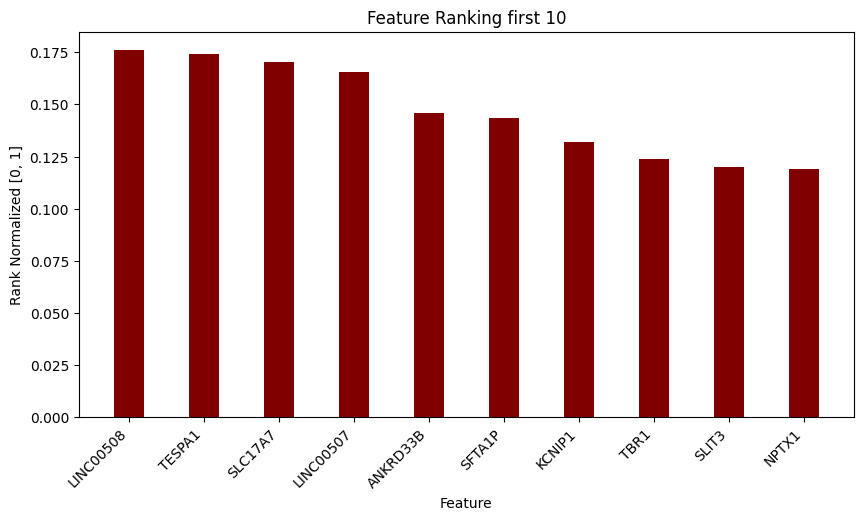

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))

feature_names = [tup[0] for tup in first_10]
feature_values = [tup[1] for tup in first_10]

plt.xticks(rotation=45, ha='right')

# creating the bar plot
plt.bar(feature_names, feature_values, color ='maroon',
        width = 0.4)

plt.xlabel('Feature')
plt.ylabel('Rank Normalized [0, 1]')
plt.title('Feature Ranking first 10')

plt.show()
           

### Accuracy

In [18]:
ac = accuracy_score(predict, y_test)
print('Accuracy is:', ac)

Accuracy is: 0.9862385321100917


### F1 Score

In [19]:
f1_score(y_test, predict)

0.9795918367346939

### Precision and Recall

In [20]:
for score in precision_recall_fscore_support(y_test, predict):
    print(score)


[1.   0.96]
[0.97945205 1.        ]
[0.98961938 0.97959184]
[146  72]


In [21]:
model.oob_score_

0.996937212863706

In [22]:
print(len(model.oob_decision_function_))

653


In [23]:
length = len(x_test)
y_pred = []
cm = confusion_matrix(y_test, y_pred, lbels=model.classes_, normalize=None)
disp = ConfusionMatrixDisplay

TypeError: confusion_matrix() got an unexpected keyword argument 'lbels'